<a href="https://colab.research.google.com/github/cesaradrianpenalozaalarcon-byte/Simulacion-2/blob/main/Muestreo_de_importancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd #Nuestras librerias a utilizar

In [65]:
def f(x): #La fucnion que qeuremos sacar
  return np.cos(x*np.pi/2)

In [66]:
def g(x): #La aproximacion de taylor hasta x**4 para tener mas precision e los calculos
  return (1-((np.pi**2)*(x**2)/8)+(np.pi**4)*(x**4)/384)


In [73]:
def g1(x): #La funcion pero multiplicada por un coeficiente para qe la integral de 0 a 1 sea 1 osea una funcion de probabilidad
  return (1/.6395)*(1-((np.pi**2)*(x**2)/8)+(np.pi**4)*(x**4)/384)

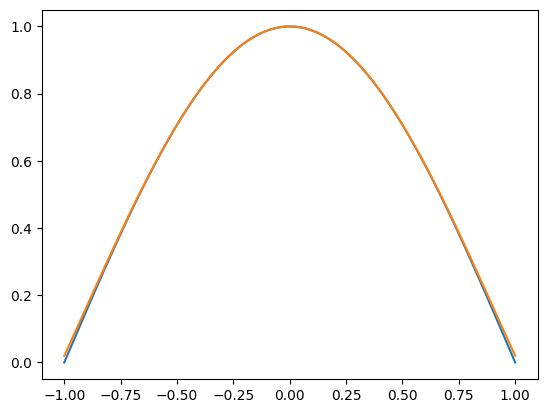

In [68]:
xx=np.linspace(-1,1,100) #Graficamos
plt.plot(xx,f(xx))
plt.plot(xx,g(xx))

In [74]:
def Funcion(N): #Generamos a la funcion f
  a=[]
  c = (1/.6395) #La c se calculo manualmente por la integral de la de taylor
  for i in range (N):
    u=rd.random()
    w=rd.uniform(0,c)
    if w<= g(u):
      a.append(u)
  return a


In [70]:
M=Funcion(1000)



In [75]:
def Muestreo_importancia(A): #Usamos a funcion(A) que es una lista para correr nuestro estimador
  b=[]
  u=Funcion(A)
  for i in u:
    b.append(f(i)/g1(i))
  return np.mean(b),np.var(b),np.std(b)

In [87]:
print(Muestreo_importancia(1000)[0],Muestreo_importancia(1000)[1]) #Imprimimos nuestros resultados

0.6377525835533373 0.00014652455313309267


In [78]:
def Montecarlo_crudo(N1): #El metodo de montecarlo para compararlos
  c=[]
  for i in range (N1):
    u=rd.random()
    c.append(f(u))
  return np.mean(c),np.var(c),np.std(c)


In [88]:
print("El valor de la integral por montecarlo crudo es:",Montecarlo_crudo(1000)[0])
print("La varianza es:",Montecarlo_crudo(1000)[1])


El valor de la integral por montecarlo crudo es: 0.6394754392661889
La varianza es: 0.09270480923040071


In [92]:
print("El porcentaje de reduccion de varianza es:",(Montecarlo_crudo(1000)[1]-Muestreo_importancia(1000)[1])/Montecarlo_crudo(1000)[1]*100,"%")
#Esto nps muestra que la reduccion de varianza es mucho mejor usando muestreo de importancia que con montecarlo crudo

El porcentaje de reduccion de varianza es: 99.62210494578322 %


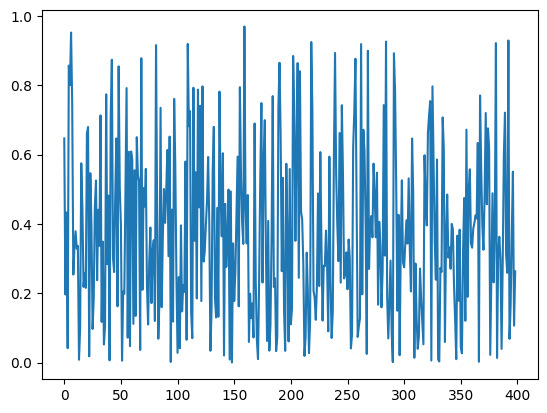

In [77]:
plt.plot(M)